In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train = pd.read_csv('gcTrianingSet.csv')
test = pd.read_csv('gcPredictionFile.csv')

In [4]:
train.head(30)

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
0,4.249634,2.999878,token_1,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.371230,4.409714,2.839798
1,4.409720,2.839792,token_2,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.220883,4.482361,2.767151
2,4.482361,2.767151,token_3,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.141776,4.542626,2.706886
3,4.542626,2.706886,token_4,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.156459,4.616293,2.633218
4,4.616296,2.633216,token_5,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.285218,4.787172,2.462339
5,4.787174,2.462337,token_6,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.170063,4.902623,2.346889
6,4.902623,2.346889,token_7,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.164785,4.977153,2.272359
7,4.977155,2.272357,token_8,True,5.055250,4.142316,7.249512,0.19,0.00,0.07,0.154474,4.168083,3.081428
8,4.171586,3.077926,token_9,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.457611,4.520573,2.728938
9,4.523625,2.725887,token_10,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.182251,4.621179,2.628333


In [5]:
test.head()

,initialUsedMemory,initialFreeMemory,query token,cpuTimeTaken,gcRun
0,4.247186,2.774299,token_11,0.408436,NaN
1,NaN,NaN,token_76,0.124429,NaN
2,NaN,NaN,token_53,0.245838,NaN
3,NaN,NaN,token_88,0.169346,NaN
4,NaN,NaN,token_70,0.296311,NaN


In [6]:
train.shape , test.shape

((2730, 13), (1625, 5))

In [7]:
train.describe()

,initialUsedMemory,initialFreeMemory,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,5.775503,1.921919,0.415684,0.291495,0.479192,0.018359,0.000535,0.002755,0.186569,5.775588,1.921990
std,0.801402,0.726219,1.619302,1.132280,1.855206,0.111837,0.007700,0.016707,0.128994,0.802645,0.728086
min,4.129662,0.330214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001052,4.117682,0.330214
25%,5.143413,1.338731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112348,5.137244,1.337994
50%,5.758096,1.961032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141588,5.758960,1.959821
75%,6.418293,2.484630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230622,6.419282,2.484630
max,7.520346,3.728506,7.583425,5.281528,8.037598,2.410000,0.260000,0.350000,0.906536,7.520346,3.749075


In [8]:
l =[]
for index,row in train.iterrows():
    a = row['initialUsedMemory']+row['initialFreeMemory']
    l.append(a)
train['initialTotalMemory'] = l

In [9]:
train['initialTotalMemory']

0       7.249512
1       7.249512
2       7.249512
3       7.249512
4       7.249512
5       7.249512
6       7.249512
7       7.249512
8       7.249512
9       7.249512
10      7.249512
11      7.249512
12      7.249512
13      7.249512
14      7.249512
15      7.249512
16      7.249512
17      7.249512
18      7.249512
19      7.249512
20      7.249512
21      7.249512
22      7.249512
23      7.249512
24      7.249512
25      7.249512
26      7.249512
27      7.249512
28      7.249512
29      7.249512
          ...   
2700    7.606934
2701    7.606934
2702    7.606934
2703    7.606934
2704    7.606934
2705    7.606934
2706    7.606934
2707    7.606934
2708    7.606934
2709    7.606934
2710    7.606934
2711    7.606934
2712    7.606934
2713    7.606934
2714    7.606934
2715    7.606934
2716    7.694824
2717    7.694824
2718    7.694824
2719    7.694824
2720    7.694824
2721    7.694824
2722    7.694824
2723    7.694824
2724    7.694824
2725    7.694824
2726    7.694824
2727    7.6948

In [10]:
l =[]
for index,row in train.iterrows():
    a = row['finalUsedMemory']+row['finalFreeMemory']
    l.append(a)
train['finalTotalMemory'] = l

In [11]:
train['finalTotalMemory'].max()

8.037597657000001

In [12]:
l =[]
for index,row in train.iterrows():
    a = row['finalTotalMemory']-row['initialTotalMemory']
    l.append(float("{0:.6f}".format(a)))
train['changeInMemory'] = l

In [13]:
# train.drop(['chnageInMemory'],axis =1 ,inplace=True)

In [14]:
train['changeInMemory'].value_counts()

-0.000000    2572
 0.006348       4
 0.018066       3
 0.011719       3
 0.025879       3
-0.001953       2
-0.004883       2
 0.021973       2
 0.016113       2
 0.003906       2
 0.006836       2
 0.056641       2
 0.043945       2
 0.027832       2
 0.045898       2
 0.028809       2
 0.004395       2
 0.030273       2
 0.025391       2
 0.029297       2
-0.025391       2
 0.043457       2
 0.010254       2
 0.048828       2
 0.018555       2
 0.036621       2
 0.009766       1
-0.039551       1
-0.214844       1
 0.003418       1
             ... 
-0.058594       1
-0.072266       1
 0.028320       1
 0.041992       1
-0.001465       1
 0.024414       1
 0.000488       1
 0.145020       1
 0.275879       1
-0.012695       1
 0.069336       1
-0.045410       1
 0.096680       1
-0.299316       1
-0.007324       1
 0.007812       1
-0.198242       1
-0.040039       1
-0.010254       1
 0.011230       1
 0.085449       1
 0.277832       1
-0.284668       1
-0.224121       1
 0.254883 

In [15]:
train['gcRun'].value_counts()

False    2559
True      171
Name: gcRun, dtype: int64

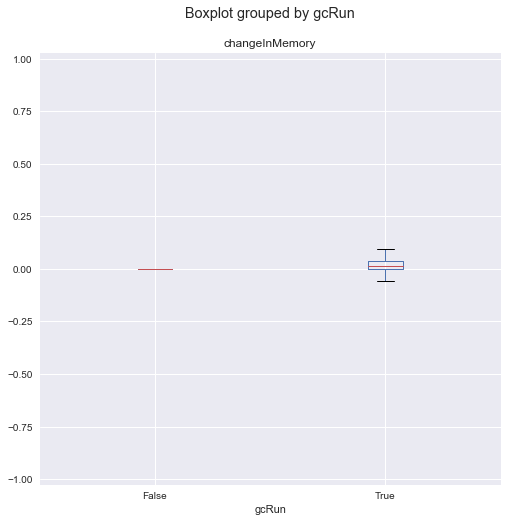

In [16]:
train.boxplot(column="changeInMemory",by= "gcRun",figsize= (8,8))
plt.show()

In [17]:
carat_table = pd.crosstab(index=train["changeInMemory"], 
                          columns=train["gcRun"])


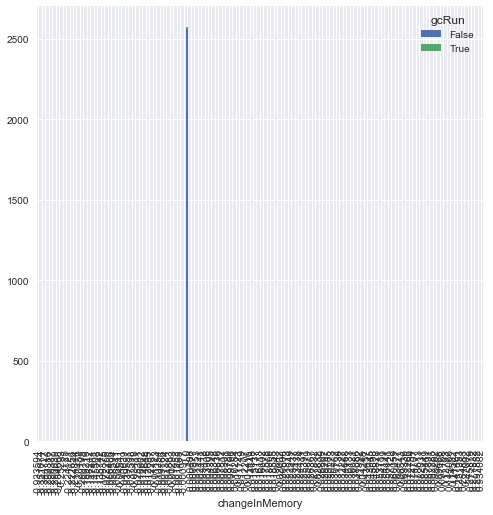

In [18]:
carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()

In [19]:
l =[]
for index,row in train.iterrows():
    token = row['query token']
    l.append(int(filter(str.isdigit, token)))
train['token'] = l

In [20]:
train['query token'].unique()

array(['token_1', 'token_2', 'token_3', 'token_4', 'token_5', 'token_6',
       'token_7', 'token_8', 'token_9', 'token_10', 'token_11', 'token_12',
       'token_13', 'token_14', 'token_15', 'token_16', 'token_17',
       'token_18', 'token_19', 'token_20', 'token_21', 'token_22',
       'token_23', 'token_24', 'token_25', 'token_26', 'token_27',
       'token_28', 'token_29', 'token_30', 'token_31', 'token_32',
       'token_33', 'token_34', 'token_35', 'token_36', 'token_37',
       'token_38', 'token_39', 'token_40', 'token_41', 'token_42',
       'token_43', 'token_44', 'token_45', 'token_46', 'token_47',
       'token_48', 'token_49', 'token_50', 'token_51', 'token_52',
       'token_53', 'token_54', 'token_55', 'token_56', 'token_57',
       'token_58', 'token_59', 'token_60', 'token_61', 'token_62',
       'token_63', 'token_64', 'token_65', 'token_66', 'token_67',
       'token_68', 'token_69', 'token_70', 'token_71', 'token_72',
       'token_73', 'token_74', 'token_75', 'tok

In [21]:
train['token'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91], dtype=int64)

In [22]:
dic = {True:1 ,
      False :0}

In [23]:

train['gcRun'] = train['gcRun'].map(dic).astype(int)

In [24]:
train.drop(['query token','initialTotalMemory','finalTotalMemory'],axis=1,inplace=True)

In [109]:
train.sort_values('gcRun',ascending=False)

,initialUsedMemory,initialFreeMemory,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,changeInMemory,token
1713,7.108292,0.520126,1,7.125669,4.826138,7.703125,0.10,0.00,0.02,0.104199,4.870755,2.832370,0.074707,73
992,5.930214,1.787560,1,6.639056,4.826378,7.720215,2.41,0.16,0.35,0.866356,5.070083,2.650131,0.002441,45
359,6.005906,1.667922,1,6.068676,4.133990,7.675781,0.20,0.00,0.03,0.112617,4.146201,3.529580,0.001953,78
2117,6.902572,0.934342,1,7.197037,5.167214,7.855957,0.56,0.00,0.08,0.601591,5.468329,2.387628,0.019043,23
123,5.019073,1.280243,1,5.086496,4.137759,7.233398,0.17,0.00,0.03,0.143682,4.155448,3.077951,0.934082,82
1593,7.448299,0.589299,1,7.471381,4.830025,7.787598,0.10,0.00,0.02,0.129906,4.873292,2.914306,-0.250000,39
1806,7.119806,0.721991,1,7.228599,4.898539,7.853516,0.25,0.00,0.04,0.280157,4.969297,2.884219,0.011719,15
2531,7.158083,0.718871,1,7.275921,5.086042,7.880859,0.32,0.00,0.04,0.278261,5.164261,2.716598,0.003906,89
841,6.219459,1.226830,1,6.224496,4.332231,7.482422,0.09,0.01,0.01,0.190280,4.423623,3.058798,0.036133,11
589,6.365489,1.549062,1,6.408370,4.114296,7.624512,0.13,0.00,0.02,0.858200,5.029662,2.594849,-0.290039,45


In [110]:
train.head()

,initialUsedMemory,initialFreeMemory,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,changeInMemory,token
0,4.249634,2.999878,0,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798,-0.0,1
1,4.409720,2.839792,0,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151,-0.0,2
2,4.482361,2.767151,0,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886,0.0,3
3,4.542626,2.706886,0,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218,-0.0,4
4,4.616296,2.633216,0,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339,0.0,5


In [111]:
train.shape

(2730, 14)

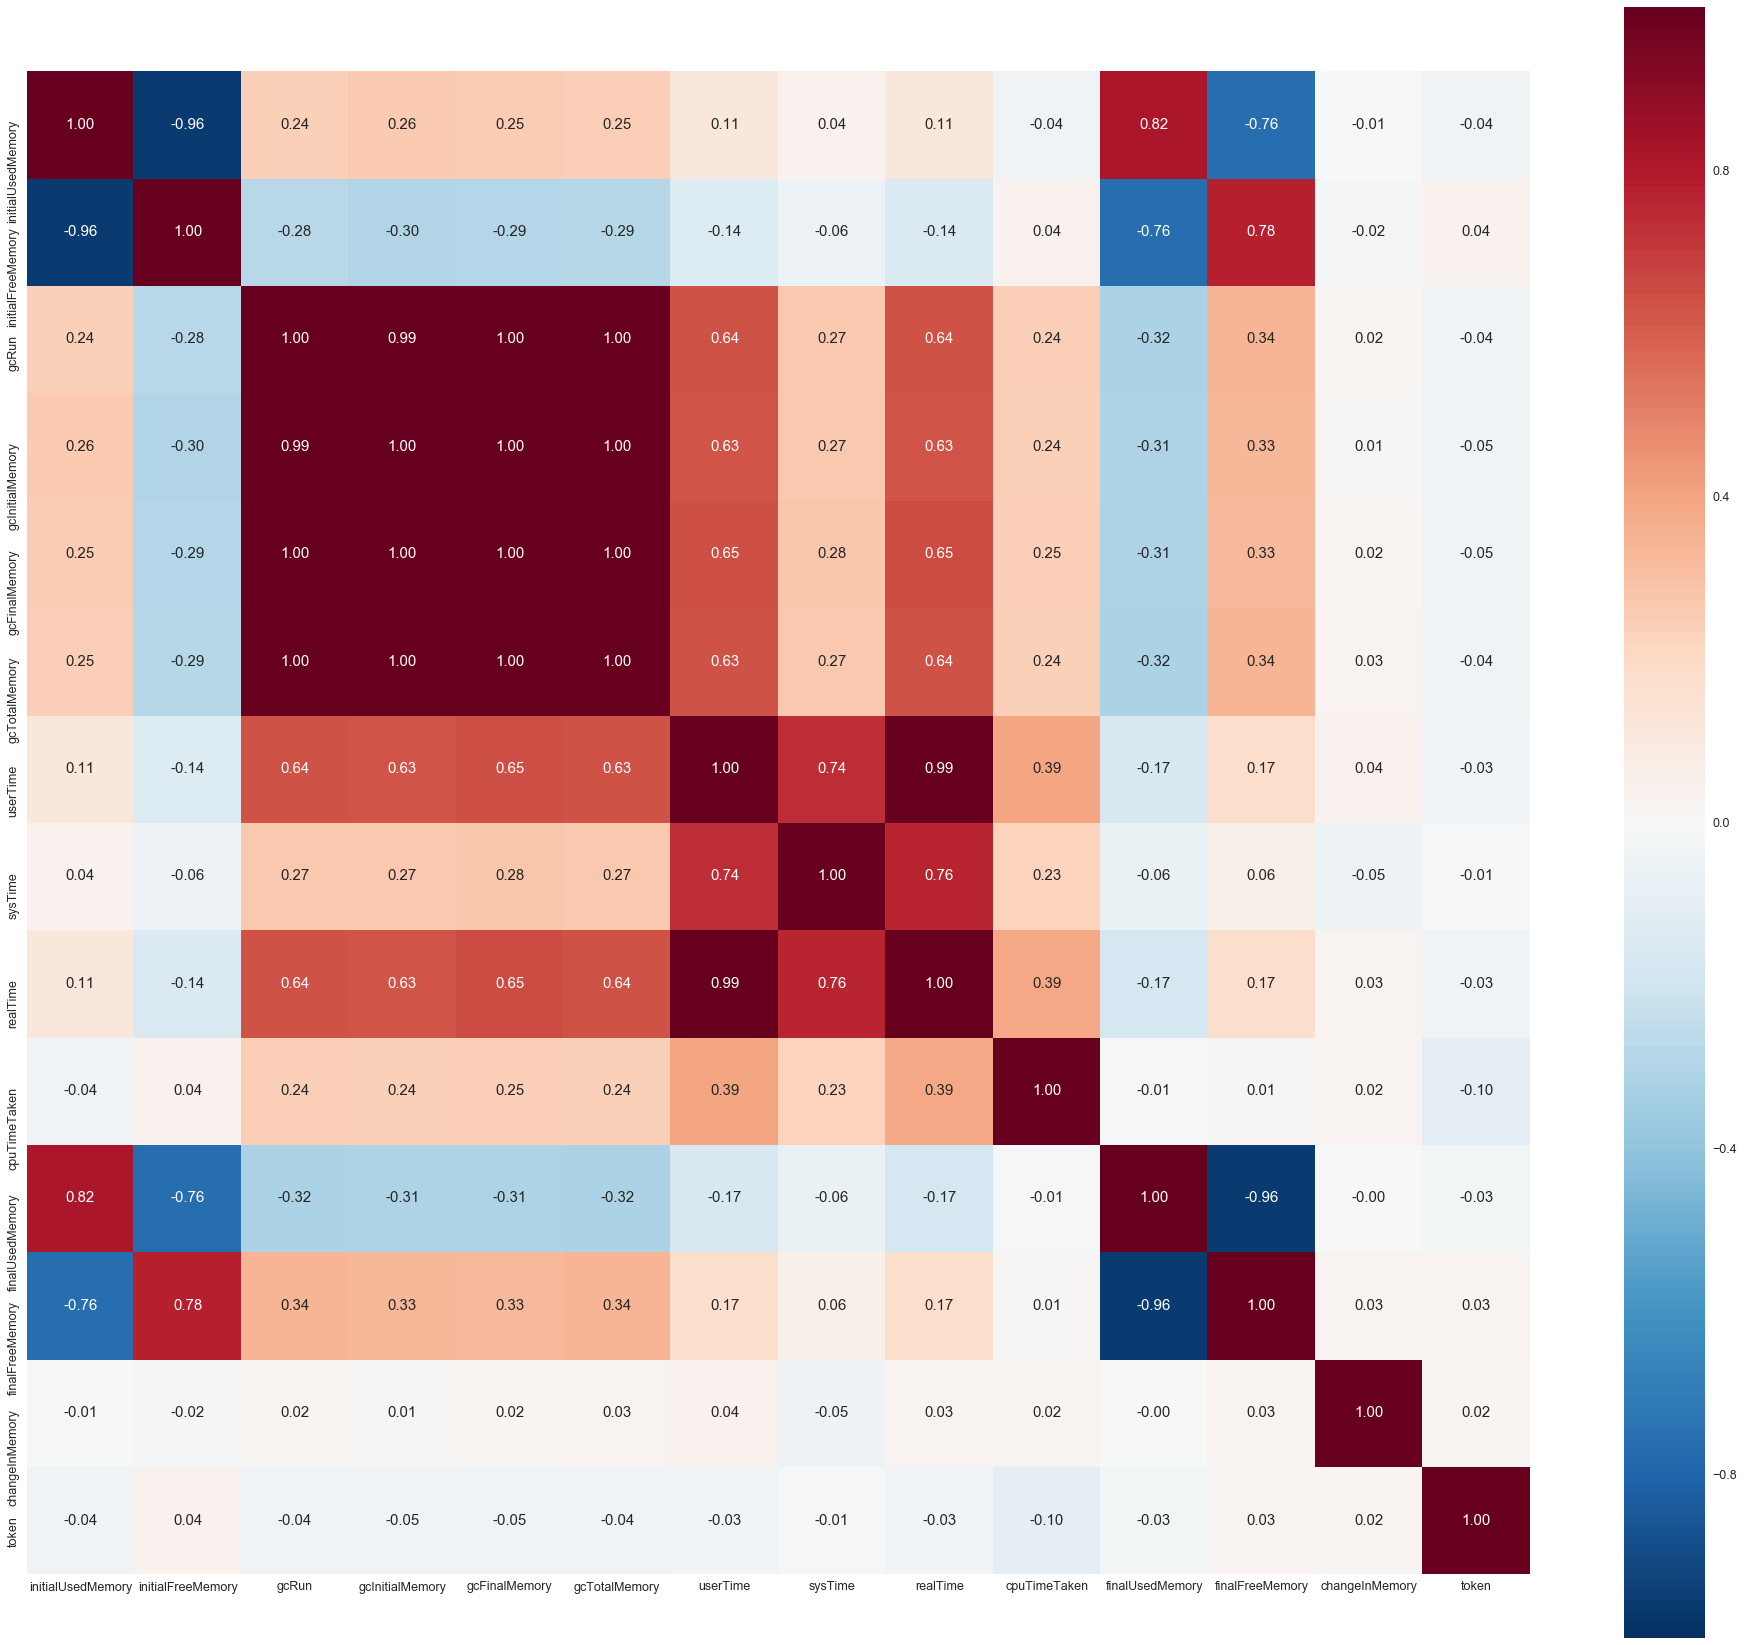

In [112]:
cm = np.corrcoef(train.values.T)
sns.set(font_scale=1.25)
a4_dims = (30,30)
fig ,ax = plt.subplots(figsize=a4_dims)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',ax =ax, yticklabels=train.columns.values, xticklabels=train.columns.values)
plt.show()

In [133]:
X = train[['token','cpuTimeTaken']]
y = train['gcRun']

In [134]:
X , y

(      token  cpuTimeTaken
 0         1      0.371230
 1         2      0.220883
 2         3      0.141776
 3         4      0.156459
 4         5      0.285218
 5         6      0.170063
 6         7      0.164785
 7         8      0.154474
 8         9      0.457611
 9        10      0.182251
 10       11      0.190840
 11       12      0.207480
 12       13      0.121614
 13       14      0.227620
 14       15      0.275411
 15       16      0.070200
 16       17      0.239481
 17       18      0.173965
 18       19      0.252222
 19       20      0.197709
 20       21      0.206092
 21       22      0.096779
 22       23      0.592555
 23       24      0.216461
 24       25      0.086305
 25       26      0.026951
 26       27      0.100673
 27       28      0.171593
 28       29      0.123160
 29       30      0.119891
 ...     ...           ...
 2700     57      0.081003
 2701     87      0.119174
 2702     10      0.181636
 2703     71      0.144991
 2704     82      0.139357
 

In [135]:
scale= StandardScaler()
X = scale.fit_transform(X)

In [136]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [137]:
# pca = PCA(n_components=10)
# fit =pca.fit(X)  


In [138]:
# fit.components_

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state=42)

In [149]:
clf_lr = linear_model.LinearRegression()
clf_svm = svm.SVC(degree=2)

In [121]:
X_test

array([[-0.3045548 ,  0.36791129],
       [-1.67505137, -0.53368882],
       [ 0.2284161 ,  0.56335023],
       ..., 
       [ 1.18014983, -0.60449531],
       [-0.60910959, -0.52849429],
       [ 0.3045548 , -0.5202697 ]])

In [88]:
clf_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
clf_lr.score(X_test,y_test)

0.0030676782303464822

In [150]:
clf_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
clf_svm.score(X_test,y_test)

0.92700729927007297

In [124]:
test.head()

,initialUsedMemory,initialFreeMemory,cpuTimeTaken,gcRun,token
0,4.247186,2.774299,0.408436,NaN,11
1,NaN,NaN,0.124429,NaN,76
2,NaN,NaN,0.245838,NaN,53
3,NaN,NaN,0.169346,NaN,88
4,NaN,NaN,0.296311,NaN,70


In [143]:
l =[]
for index,row in test.iterrows():
    token = row['query token']
    l.append(int(filter(str.isdigit, token)))
test['token'] = l

KeyError: 'query token'

In [99]:
test.drop(['query token'],axis=1,inplace=True)

ValueError: labels ['query token'] not contained in axis

In [152]:
xt = test[['cpuTimeTaken','token']]

In [153]:
y = clf_svm.predict(xt)

In [154]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
from collections import Counter

In [156]:
Counter(y)

Counter({0: 1625})